In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("/content/creditcard.csv")
print(df.head())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/tmp/ipython-input-500857089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


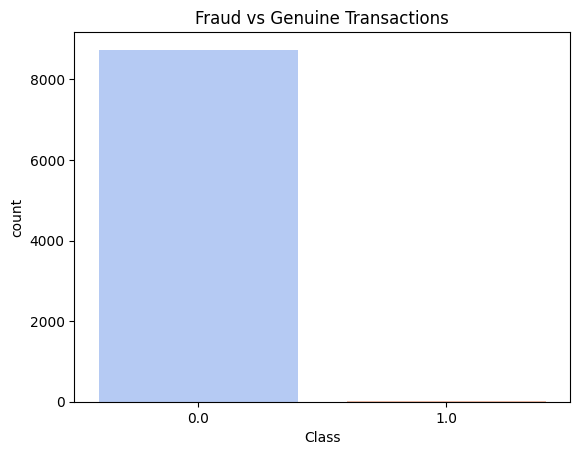

In [ ]:
# ----------------- EDA -----------------

# Class distribution
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs Genuine Transactions")
plt.show()

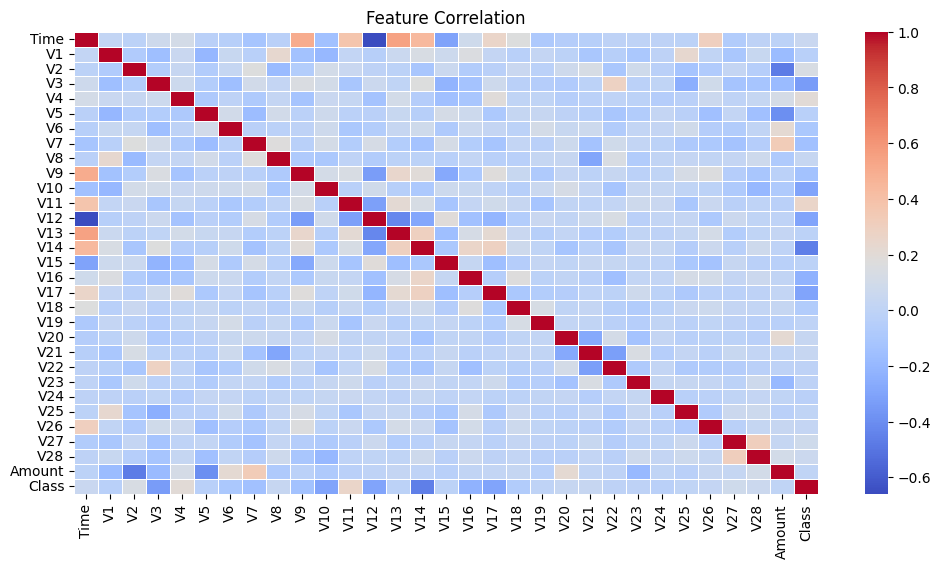

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

In [ ]:
print(y.isnull().sum())


1


In [ ]:
df = df.dropna(subset=['Class'])  # Removes rows where Class is NaN


In [ ]:
print(X.isnull().sum().sum())  # Total NaNs in features
X = X.fillna(0)  # Or use imputation (mean/median) if needed


7


In [ ]:
# After cleaning
X = df.drop('Class', axis=1)
y = df['Class']

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
# ----------------- Train-Test Split -----------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# ----------------- Model Training -----------------
# Option 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Option 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4618
         1.0       0.99      0.98      0.99      4676

    accuracy                           0.99      9294
   macro avg       0.99      0.99      0.99      9294
weighted avg       0.99      0.99      0.99      9294



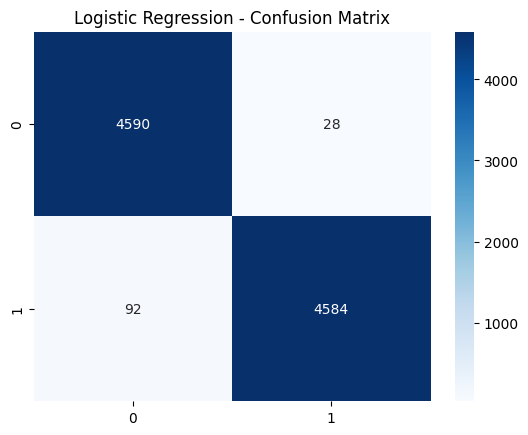


Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4618
         1.0       1.00      1.00      1.00      4676

    accuracy                           1.00      9294
   macro avg       1.00      1.00      1.00      9294
weighted avg       1.00      1.00      1.00      9294



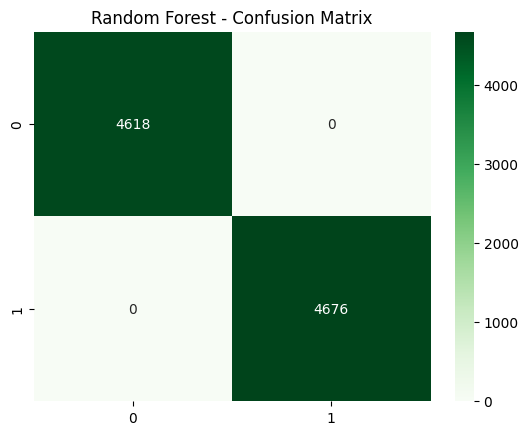

In [ ]:
# ----------------- Model Evaluation -----------------
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()